In [1]:
import pandas as pd
import numpy as np
import re
import time

start = time.time()

df = pd.read_csv('cars.csv', low_memory=False)
pd.set_option('display.max_columns', 234)

In [2]:
df = df.transpose()

In [3]:
df.shape

(32316, 234)

In [4]:
# df.get_dtype_counts

In [5]:
df = df.reset_index()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32316 entries, 0 to 32315
Columns: 235 entries, index to Hybrid/Electric Components Note
dtypes: object(235)
memory usage: 57.9+ MB


In [7]:
# df.describe()

## Removing Extraneous Data


**Columns with 100% missing values**

These columns contain no information and are removed from the dataset in the code below.



In [8]:
# Removing columns with 100% missing values
df = df.dropna(how='all', axis=1)
print('The size of the dataset: ' + str(df.shape))

The size of the dataset: (32316, 231)


### Remove duplicates

In [9]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32316 entries, 0 to 32315
Columns: 231 entries, index to Hybrid/Electric Components Note
dtypes: object(231)
memory usage: 57.2+ MB


### Remove columns with only one unique value

In [10]:
# removing columns with only one unique value , args=(False)

df = df.loc[:,df.apply(func=pd.Series.nunique) > 1]

print('The size of the removed dataset: ', df.shape)

The size of the removed dataset:  (32316, 228)


# Prepare target column
It has missing values. Drop the those rows from dataset. Remove $ sign and ','.

In [11]:
df = df[df['MSRP'].notnull()]
print(df.shape)

(32262, 228)


In [12]:
df.loc[:, 'MSRP'] = df.loc[:, 'MSRP'].apply(lambda x: x.replace('$', '').replace(',', ''))
df['MSRP'] = pd.to_numeric(df['MSRP'], errors='coerse')
df['MSRP'].head()

0    40600
1    45500
2    43600
3    37400
4    42600
Name: MSRP, dtype: int64

### Extract Year and Model from one column

In [13]:
df['Year'] = df['index'].str[:4]

In [14]:
df['Year'].dtype

dtype('O')

In [15]:
df['Year'] = df['Year'].astype('category')
df['Year'].dtype

category

In [16]:
df['Specs'] = df['index'].str[5:]

In [17]:
# df['Specs'] = df['Specs'].str.split(pat=' Specs: ')

# ??? Is there a better way to write this code???

In [18]:
for idx, item in df['index'].iteritems():
    df.loc[idx, 'Model'] = item.split(' Specs: ')[0]
    df.loc[idx, 'Specs'] = item.split(' Specs: ')[1]

### Size and Volume data cleaning

In [19]:
df['Volume'] = df['Cargo Volume (ft³)']
df['Width'] = df['Width, Max w/o mirrors (in)']
df['Height'] = df['Height, Overall (in)']
df['Length'] = df['Length, Overall (in)']


# df.rename(columns={'Cargo Volume (ft³)': 'Volume',
#                   'Width, Max w/o mirrors (in)': 'Width', 
#                   'Height, Overall (in)': 'Height',
#                   'Length, Overall (in)': 'Length'}, inplace=True)
size_list_short = ['Volume',
                   'Width',
                   'Height',
                   'Length']

In [20]:
df[size_list_short]

,Volume,Width,Height,Length
0,NaN,74.8,65.7,NaN
1,NaN,74.8,65.7,NaN
2,NaN,74.8,65.7,NaN
3,NaN,74.8,65.7,NaN
4,NaN,74.8,65.7,NaN
5,NaN,74.8,65.7,NaN
6,NaN,74.8,65.7,NaN
7,NaN,73.7,65,NaN
8,NaN,73.7,65,NaN
9,NaN,73.7,65,NaN


In [21]:
# Check non-null
df[size_list_short].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32262 entries, 0 to 32315
Data columns (total 4 columns):
Volume    7522 non-null object
Width     30212 non-null object
Height    30230 non-null object
Length    17486 non-null object
dtypes: object(4)
memory usage: 2.5+ MB


In [22]:
# df = df.drop(['Width, Max w/o mirrors (in)', 'Height, Overall (in)','Length, Overall (in)', 'Cargo Volume (ft³)'], axis=1)

In [23]:
def to_float(col_list):
    for col in col_list:
    # df[col] = df[col].fillna('')
        df.loc[:, col] = pd.to_numeric(df.loc[:, col], errors='coerce')


In [24]:
to_float(size_list_short)

In [25]:
df[size_list_short].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32262 entries, 0 to 32315
Data columns (total 4 columns):
Volume    6479 non-null float64
Width     30160 non-null float64
Height    30089 non-null float64
Length    17454 non-null float64
dtypes: float64(4)
memory usage: 2.5 MB


In [26]:
df['Size_avg'] = df[['Width', 'Length', 'Height']].sum(axis=1) / 3
size_list_short.append('Size')
df['Size_avg'] 

0         46.833333
1         46.833333
2         46.833333
3         46.833333
4         46.833333
5         46.833333
6         46.833333
7         46.233333
8         46.233333
9         46.233333
10        46.233333
11        46.233333
12        46.233333
13        46.233333
14        46.233333
15        46.233333
16        46.233333
17        46.233333
18        46.233333
19        46.233333
20        46.233333
21        46.233333
22        46.233333
23        46.233333
24        46.233333
25        46.233333
26        46.233333
27        46.600000
28        46.600000
29        46.600000
            ...    
32286    111.266667
32287    111.266667
32288    111.266667
32289    111.266667
32290    111.266667
32291    111.266667
32292    111.266667
32293    111.266667
32294    111.266667
32295    111.266667
32296    111.266667
32297    110.533333
32298    110.533333
32299    110.533333
32300    110.533333
32301    110.533333
32302    110.533333
32303    110.533333
32304    110.533333


In [27]:
# final for features
size_list = ['Volume', 'Width','Height','Length']

### Weight data cleaning

In [28]:
weight_list_short = [
 'Gross Combined Wt Rating (lbs)',    
 'Maximum Trailering Capacity (lbs)',
 'Gross Vehicle Weight Rating Cap (lbs)'
]

In [29]:
df['Weight'] = df['Gross Combined Wt Rating (lbs)']
df['Trailer_cpt'] = df['Maximum Trailering Capacity (lbs)']

df['Weight']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
        ... 
32286    NaN
32287    NaN
32288    NaN
32289    NaN
32290    NaN
32291    NaN
32292    NaN
32293    NaN
32294    NaN
32295    NaN
32296    NaN
32297    NaN
32298    NaN
32299    NaN
32300    NaN
32301    NaN
32302    NaN
32303    NaN
32304    NaN
32305    NaN
32306    NaN
32307    NaN
32308    NaN
32309    NaN
32310    NaN
32311    NaN
32312    NaN
32313    NaN
32314    NaN
32315    NaN
Name: Weight, Length: 32262, dtype: object

In [30]:
df['Trailer_cpt']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7        1500
8        1500
9        1500
10       1500
11       1500
12       1500
13       1500
14       1500
15       1500
16       1500
17       1500
18       1500
19       1500
20       1500
21       1500
22       1500
23       1500
24       1500
25       1500
26       1500
27       1500
28       1500
29       1500
         ... 
32286     NaN
32287     NaN
32288     NaN
32289     NaN
32290     NaN
32291     NaN
32292     NaN
32293     NaN
32294     NaN
32295     NaN
32296     NaN
32297     NaN
32298     NaN
32299     NaN
32300     NaN
32301     NaN
32302     NaN
32303     NaN
32304     NaN
32305     NaN
32306     NaN
32307     NaN
32308     NaN
32309     NaN
32310     NaN
32311     NaN
32312     NaN
32313     NaN
32314     NaN
32315     NaN
Name: Trailer_cpt, Length: 32262, dtype: object

In [31]:
# df = df.drop(['Gross Combined Wt Rating (lbs)', 'Maximum Trailering Capacity (lbs)'], axis=1)

In [32]:
weight_list_short = ['Weight', 'Trailer_cpt']
df[weight_list_short].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32262 entries, 0 to 32315
Data columns (total 2 columns):
Weight         9921 non-null object
Trailer_cpt    5709 non-null object
dtypes: object(2)
memory usage: 2.0+ MB


In [33]:
to_float(weight_list_short)

In [34]:
df[weight_list_short].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32262 entries, 0 to 32315
Data columns (total 2 columns):
Weight         8205 non-null float64
Trailer_cpt    5672 non-null float64
dtypes: float64(2)
memory usage: 2.0 MB


In [35]:
# update list for features
weight_list = ['Weight', 'Trailer_cpt']

### Fuel data cleaning

In [36]:
fuel_economy_list_short = [
 'Fuel Tank Capacity, Approx (gal)',
 'Fuel Economy Est-Combined (MPG)',
 'EPA Fuel Economy Est - City (MPG)',
 'EPA Fuel Economy Est - Hwy (MPG)'
]

In [37]:
df['Fuel_Tank_Cpt'] = df['Fuel Tank Capacity, Approx (gal)']
df['MPG_avg'] = df['Fuel Economy Est-Combined (MPG)']
df['MPG_City'] = df['EPA Fuel Economy Est - City (MPG)']
df['MPG_Hwy'] = df['EPA Fuel Economy Est - Hwy (MPG)']
fuel_economy_list_short =['Fuel_Tank_Cpt', 'MPG_avg', 'MPG_City', 'MPG_Hwy']
                    

In [38]:
df[fuel_economy_list_short]

,Fuel_Tank_Cpt,MPG_avg,MPG_City,MPG_Hwy
0,17.1,24,22,28
1,17.1,24,22,28
2,17.1,24,22,27
3,17.1,24,22,28
4,17.1,23,21,27
5,17.1,23,21,27
6,17.1,23,21,26
7,16,22,19,27
8,16,23,20,28
9,16,23,20,28


In [39]:
df[fuel_economy_list_short].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32262 entries, 0 to 32315
Data columns (total 4 columns):
Fuel_Tank_Cpt    30129 non-null object
MPG_avg          17600 non-null object
MPG_City         27129 non-null object
MPG_Hwy          27129 non-null object
dtypes: object(4)
memory usage: 2.5+ MB


In [40]:
def clean(col):
    df[col] = df[col].fillna('')
    df[col] = df[col].apply(lambda x: x[:2] if r'(' in x else x)
    
    

# 'MPG_avg', 'MPG_City', 'MPG_Hwy'

In [41]:
clean('MPG_avg')

In [42]:
clean('MPG_City')

In [43]:
clean('MPG_Hwy')

In [44]:
df[fuel_economy_list_short]

,Fuel_Tank_Cpt,MPG_avg,MPG_City,MPG_Hwy
0,17.1,24,22,28
1,17.1,24,22,28
2,17.1,24,22,27
3,17.1,24,22,28
4,17.1,23,21,27
5,17.1,23,21,27
6,17.1,23,21,26
7,16,22,19,27
8,16,23,20,28
9,16,23,20,28


In [45]:
to_float(fuel_economy_list_short)
df[fuel_economy_list_short].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32262 entries, 0 to 32315
Data columns (total 4 columns):
Fuel_Tank_Cpt    30095 non-null float64
MPG_avg          17369 non-null float64
MPG_City         26990 non-null float64
MPG_Hwy          26986 non-null float64
dtypes: float64(4)
memory usage: 2.5 MB


In [46]:
# update list to be used as features
fuel_economy_list =['Fuel_Tank_Cpt', 'MPG_avg', 'MPG_City', 'MPG_Hwy']

# Transmission data cleaning

In [47]:
trans_list = [
 'Trans Description Cont.',
 'Trans Order Code',
 'Trans Description Cont. Again',
 'Trans Type',
 'Trans PTO Access',
 'Transmission',
 'Trans Power Take Off']

df[trans_list]

,Trans Description Cont.,Trans Order Code,Trans Description Cont. Again,Trans Type,Trans PTO Access,Transmission,Trans Power Take Off
0,Automatic w/OD,NaN,NaN,10,NaN,Transmission: 10-Speed Automatic -inc: sequent...,NaN
1,Automatic w/OD,NaN,NaN,10,NaN,Transmission: 10-Speed Automatic -inc: sequent...,NaN
2,Automatic w/OD,NaN,NaN,10,NaN,Transmission: 10-Speed Automatic -inc: sequent...,NaN
3,Automatic w/OD,NaN,NaN,10,NaN,Transmission: 10-Speed Automatic -inc: sequent...,NaN
4,Automatic w/OD,NaN,NaN,10,NaN,Transmission: 10-Speed Automatic -inc: sequent...,NaN
5,Automatic w/OD,NaN,NaN,10,NaN,Transmission: 10-Speed Automatic -inc: sequent...,NaN
6,Automatic w/OD,NaN,NaN,10,NaN,Transmission: 10-Speed Automatic -inc: sequent...,NaN
7,Automatic w/OD,NaN,NaN,6,NaN,Transmission: 6-Speed Automatic -inc: Sequenti...,NaN
8,Automatic w/OD,NaN,NaN,6,NaN,Transmission: 6-Speed Automatic -inc: Sequenti...,NaN
9,Automatic w/OD,NaN,NaN,6,NaN,Transmission: 6-Speed Automatic -inc: Sequenti...,NaN


In [48]:
df['Trans_Speed'] = df['Trans Type']

In [49]:
df['Trans_Speed'].dtype

dtype('O')

In [50]:
trans_list_to_float = ['Trans_Speed']
to_float(trans_list_to_float)

df[trans_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32262 entries, 0 to 32315
Data columns (total 7 columns):
Trans Description Cont.          30225 non-null object
Trans Order Code                 13279 non-null object
Trans Description Cont. Again    2358 non-null object
Trans Type                       30281 non-null object
Trans PTO Access                 3594 non-null object
Transmission                     29551 non-null object
Trans Power Take Off             953 non-null object
dtypes: object(7)
memory usage: 3.2+ MB


In [51]:
# update list to be used as features
trans_list = ['Trans_Speed']

## Safety data cleaning

In [52]:
safety_list = [
 'Air Bag-Frontal-Driver',
 'Air Bag-Frontal-Passenger',
 'Air Bag-Passenger Switch (On/Off)',
 'Air Bag-Side Body-Front',
 'Air Bag-Side Body-Rear',
 'Air Bag-Side Head-Front',
 'Air Bag-Side Head-Rear',
 'Child Safety Rear Door Locks',
 'Daytime Running Lights',
 'Traction Control',
 'Night Vision',
 'Rollover Protection Bars',
 'Fog Lamps',
 'Parking Aid',
 'Tire Pressure Monitor',
 'Back-Up Camera',
 'Stability Control'
]

In [183]:
# safety_list
dict1 = {'Air Bag-Frontal-Driver': 'Airbag_Front_Driver',
 'Air Bag-Frontal-Passenger': 'Airbag_Front_Psg',
 'Air Bag-Passenger Switch (On/Off)':'Airbag_Psg_Switch',
 'Air Bag-Side Body-Front': 'Airbag_SBF',
 'Air Bag-Side Body-Rear': 'Airbag_SBR',
 'Air Bag-Side Head-Front': 'Airbag_SHF',
 'Air Bag-Side Head-Rear': 'Airbag_SHR',
 'Child Safety Rear Door Locks': 'Child_Door_Locks',
 'Daytime Running Lights': 'Day_Lights',
 'Traction Control': 'Trac_Control',
 'Night Vision': 'Night_Vision',
 'Rollover Protection Bars': 'Rollover_Prt',
 'Fog Lamps': 'Fog_Lamps','Parking Aid': 'Parking_Aid',
 'Tire Pressure Monitor': 'Tire_P_Monitor',
 'Back-Up Camera': 'Backup_Camera',
 'Stability Control': 'Stability_Ctl'}
df.rename(columns=dict1, inplace=True)

In [185]:
df.rename(columns=dict1, inplace=True).columns.tolist()

AttributeError: 'NoneType' object has no attribute 'columns'

In [53]:
df[safety_list]

,Air Bag-Frontal-Driver,Air Bag-Frontal-Passenger,Air Bag-Passenger Switch (On/Off),Air Bag-Side Body-Front,Air Bag-Side Body-Rear,Air Bag-Side Head-Front,Air Bag-Side Head-Rear,Child Safety Rear Door Locks,Daytime Running Lights,Traction Control,Night Vision,Rollover Protection Bars,Fog Lamps,Parking Aid,Tire Pressure Monitor,Back-Up Camera,Stability Control
0,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes
1,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes
2,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes
3,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes
4,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes
6,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes
7,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes
8,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes
9,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes


## Brake data cleaning

In [54]:
brake_list = [
 'Drum - Rear (Yes or   )',                         
 'Disc - Front (Yes or   )',                           
 'Brake Type',
 'Brake ABS System'
]

In [55]:
df[brake_list]

,Drum - Rear (Yes or ),Disc - Front (Yes or ),Brake Type,Brake ABS System
0,NaN,Yes,4-Wheel Disc,4-Wheel
1,NaN,Yes,4-Wheel Disc,4-Wheel
2,NaN,Yes,4-Wheel Disc,4-Wheel
3,NaN,Yes,4-Wheel Disc,4-Wheel
4,NaN,Yes,4-Wheel Disc,4-Wheel
5,NaN,Yes,4-Wheel Disc,4-Wheel
6,NaN,Yes,4-Wheel Disc,4-Wheel
7,NaN,Yes,4-Wheel Disc,4-Wheel
8,NaN,Yes,4-Wheel Disc,4-Wheel
9,NaN,Yes,4-Wheel Disc,4-Wheel


In [56]:
brake_list =[]

## Gear ratio data cleaning. It doesn't seem to be important!

In [57]:
gear_ratio_list = [
 'First Gear Ratio (:1)',
 'Second Gear Ratio (:1)',
 'Third Gear Ratio (:1)',
 'Fourth Gear Ratio (:1)',
 'Fifth Gear Ratio (:1)',
 'Sixth Gear Ratio (:1)',
 'Seventh Gear Ratio (:1)',
 'Eighth Gear Ratio (:1)',
 'Ninth Gear Ratio (:1)',
 'Tenth Gear Ratio (:1)',
 'Final Drive Axle Ratio (:1)',
 'Reverse Ratio (:1)',
]

In [58]:
df[gear_ratio_list]

,First Gear Ratio (:1),Second Gear Ratio (:1),Third Gear Ratio (:1),Fourth Gear Ratio (:1),Fifth Gear Ratio (:1),Sixth Gear Ratio (:1),Seventh Gear Ratio (:1),Eighth Gear Ratio (:1),Ninth Gear Ratio (:1),Tenth Gear Ratio (:1),Final Drive Axle Ratio (:1),Reverse Ratio (:1)
0,5.25,3.27,2.19,1.60,1.30,1.00,0.78,0.65,NaN,NaN,4.17,3.97
1,5.25,3.27,2.19,1.60,1.30,1.00,0.78,0.65,NaN,NaN,4.17,3.97
2,5.25,3.27,2.19,1.60,1.30,1.00,0.78,0.65,NaN,NaN,4.17,3.97
3,5.25,3.27,2.19,1.60,1.30,1.00,0.78,0.65,NaN,NaN,4.17,3.97
4,5.25,3.27,2.19,1.60,1.30,1.00,0.78,0.65,NaN,NaN,4.17,3.97
5,5.25,3.27,2.19,1.60,1.30,1.00,0.78,0.65,NaN,NaN,4.17,3.97
6,5.25,3.27,2.19,1.60,1.30,1.00,0.78,0.65,NaN,NaN,4.17,3.97
7,3.36,2.09,1.48,1.06,0.75,0.56,NaN,NaN,NaN,NaN,4.25,2.27
8,3.36,2.09,1.48,1.06,0.75,0.56,NaN,NaN,NaN,NaN,4.25,2.27
9,3.36,2.09,1.48,1.06,0.75,0.56,NaN,NaN,NaN,NaN,4.25,2.27


In [59]:
df[gear_ratio_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32262 entries, 0 to 32315
Data columns (total 12 columns):
First Gear Ratio (:1)          29695 non-null object
Second Gear Ratio (:1)         28380 non-null object
Third Gear Ratio (:1)          28373 non-null object
Fourth Gear Ratio (:1)         28364 non-null object
Fifth Gear Ratio (:1)          23673 non-null object
Sixth Gear Ratio (:1)          16338 non-null object
Seventh Gear Ratio (:1)        5057 non-null object
Eighth Gear Ratio (:1)         3658 non-null object
Ninth Gear Ratio (:1)          86 non-null object
Tenth Gear Ratio (:1)          46 non-null object
Final Drive Axle Ratio (:1)    19619 non-null object
Reverse Ratio (:1)             29799 non-null object
dtypes: object(12)
memory usage: 4.4+ MB


In [60]:
gear_ratio_list = []

## Suspension data cleaning

In [186]:
suspension_list = [
 'Suspension Type - Front',
 'Suspension Type - Front (Cont.)',
 'Suspension Type - Rear',
 'Suspension Type - Rear (Cont.)'
]

In [ ]:
# suspension_list
dict = {'Suspension Type - Front': 'Susp_Front',
 'Suspension Type - Front (Cont.)': 'Susp_Front2',
 'Suspension Type - Rear': 'Susp_Rear',
 'Suspension Type - Rear (Cont.)': 'Susp_Rear2'}
df.rename(columns=dict, inplace=True)

In [187]:
df[suspension_list]

KeyError: "['Suspension Type - Front' 'Suspension Type - Front (Cont.)'\n 'Suspension Type - Rear' 'Suspension Type - Rear (Cont.)'] not in index"

In [63]:
df[suspension_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32262 entries, 0 to 32315
Data columns (total 4 columns):
Suspension Type - Front            30260 non-null object
Suspension Type - Front (Cont.)    15149 non-null object
Suspension Type - Rear             30249 non-null object
Suspension Type - Rear (Cont.)     15058 non-null object
dtypes: object(4)
memory usage: 2.5+ MB


In [64]:
df[suspension_list].nunique()

Suspension Type - Front            143
Suspension Type - Front (Cont.)    105
Suspension Type - Rear             222
Suspension Type - Rear (Cont.)     138
dtype: int64

In [65]:
suspension_list = [
 'Suspension Type - Front',
 'Suspension Type - Front (Cont.)',
 'Suspension Type - Rear',
 'Suspension Type - Rear (Cont.)'
]

## Axle data cleaning

In [66]:
axle_list = [
 'Axle Type - Rear',
 'Axle Type - Front',
 'Axle Ratio (:1) - Rear',
 'Axle Ratio (:1) - Front'
]

In [67]:
df[axle_list]

,Axle Type - Rear,Axle Type - Front,Axle Ratio (:1) - Rear,Axle Ratio (:1) - Front
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [68]:
df[axle_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32262 entries, 0 to 32315
Data columns (total 4 columns):
Axle Type - Rear           10275 non-null object
Axle Type - Front          9606 non-null object
Axle Ratio (:1) - Rear     10367 non-null object
Axle Ratio (:1) - Front    6479 non-null object
dtypes: object(4)
memory usage: 2.5+ MB


In [69]:
axle_list = []

## Battery data cleaning

In [70]:
battery_list = [
 'Battery Range (mi)',
 'Cold Cranking Amps @ 0° F (Primary)',
 'Cold Cranking Amps @ 0° F (2nd)'
]

In [71]:
df[battery_list]

,Battery Range (mi),Cold Cranking Amps @ 0° F (Primary),Cold Cranking Amps @ 0° F (2nd)
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,550,NaN
8,NaN,550,NaN
9,NaN,550,NaN


In [72]:
df[battery_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32262 entries, 0 to 32315
Data columns (total 3 columns):
Battery Range (mi)                     275 non-null object
Cold Cranking Amps @ 0° F (Primary)    26201 non-null object
Cold Cranking Amps @ 0° F (2nd)        2490 non-null object
dtypes: object(3)
memory usage: 2.2+ MB


In [73]:
df['Battery_Amps'] = df['Cold Cranking Amps @ 0° F (Primary)']

In [74]:
# df = df.drop(['Cold Cranking Amps @ 0° F (Primary)'], axis=1)

In [75]:
battery_list_to_float = ['Battery_Amps']
to_float(battery_list_to_float)

In [76]:
# update for features
battery_list =['Battery_Amps']

## Engine data cleaning

In [77]:
engine_list = [
 'Engine Type',                           
 'Engine Order Code',                           
 'SAE Net Torque @ RPM',
 'SAE Net Horsepower @ RPM',
 'Displacement',    
 'Engine',    
 'Engine Oil Cooler'
]

df['HP1'] = df['SAE Net Torque @ RPM']
df['HP2'] = df['SAE Net Horsepower @ RPM']
df['Engine_Type'] = df['Engine Type']
# df.drop(['SAE Net Torque @ RPM', 'SAE Net Horsepower @ RPM', 'Engine Type'], axis=1)



In [78]:
df[engine_list]

,Engine Type,Engine Order Code,SAE Net Torque @ RPM,SAE Net Horsepower @ RPM,Displacement,Engine,Engine Oil Cooler
0,Turbo Premium Unleaded I-4,NaN,280 @ 1600,272 @ 6500,2.0 L/122,"Turbo Premium Unleaded I-4, 2.0 L",NaN
1,Turbo Premium Unleaded I-4,NaN,280 @ 1600,272 @ 6500,2.0 L/122,"Turbo Premium Unleaded I-4, 2.0 L",NaN
2,Turbo Premium Unleaded I-4,NaN,280 @ 1600,272 @ 6500,2.0 L/122,"Turbo Premium Unleaded I-4, 2.0 L",NaN
3,Turbo Premium Unleaded I-4,NaN,280 @ 1600,272 @ 6500,2.0 L/122,"Turbo Premium Unleaded I-4, 2.0 L",NaN
4,Turbo Premium Unleaded I-4,NaN,280 @ 1600,272 @ 6500,2.0 L/122,"Turbo Premium Unleaded I-4, 2.0 L",NaN
5,Turbo Premium Unleaded I-4,NaN,280 @ 1600,272 @ 6500,2.0 L/122,"Turbo Premium Unleaded I-4, 2.0 L",NaN
6,Turbo Premium Unleaded I-4,NaN,280 @ 1600,272 @ 6500,2.0 L/122,"Turbo Premium Unleaded I-4, 2.0 L",NaN
7,Premium Unleaded V-6,NaN,252 @ 4900,279 @ 6200,3.5 L/212,"Premium Unleaded V-6, 3.5 L",NaN
8,Premium Unleaded V-6,NaN,252 @ 4900,279 @ 6200,3.5 L/212,"Premium Unleaded V-6, 3.5 L",NaN
9,Premium Unleaded V-6,NaN,252 @ 4900,279 @ 6200,3.5 L/212,"Premium Unleaded V-6, 3.5 L",NaN


In [79]:
engine_list = ['HP1', 'HP2', 'Engine_Type']
df[engine_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32262 entries, 0 to 32315
Data columns (total 3 columns):
HP1            30237 non-null object
HP2            30255 non-null object
Engine_Type    30288 non-null object
dtypes: object(3)
memory usage: 2.2+ MB


How to make the following code to work?

In [80]:
# def clean_engine(col):
#    df[col] = df[col].fillna('')
#    df[col] = df[col].apply(lambda x: x[:3] if r'\@' in x else x)
#    df[col] = pd.to_numeric(df[col], errors='coerse')
# clean_engine('HP1')    

In [81]:
# extract from extraneous characters
df['HP1'] = df['HP1'].str.replace(r' @ \d*', '')
df['HP1'] = df['HP1'].str.replace(r' - \d*', '')
df['HP2'] = df['HP2'].str.replace(r' @ \d*', '')
df['HP2'] = df['HP2'].str.replace(r' - \d*', '')

# conver to numeric
df['HP1'] = pd.to_numeric(df['HP1'], errors='coerse')
df['HP2'] = pd.to_numeric(df['HP2'], errors='coerse')

In [82]:
df[engine_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32262 entries, 0 to 32315
Data columns (total 3 columns):
HP1            28602 non-null float64
HP2            29452 non-null float64
Engine_Type    30288 non-null object
dtypes: float64(2), object(1)
memory usage: 2.2+ MB


In [83]:
df[engine_list].head()

,HP1,HP2,Engine_Type
0,280.0,272.0,Turbo Premium Unleaded I-4
1,280.0,272.0,Turbo Premium Unleaded I-4
2,280.0,272.0,Turbo Premium Unleaded I-4
3,280.0,272.0,Turbo Premium Unleaded I-4
4,280.0,272.0,Turbo Premium Unleaded I-4


In [84]:
df[engine_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32262 entries, 0 to 32315
Data columns (total 3 columns):
HP1            28602 non-null float64
HP2            29452 non-null float64
Engine_Type    30288 non-null object
dtypes: float64(2), object(1)
memory usage: 2.2+ MB


In [85]:
df['Engine_Type'].nunique()

167

In [86]:
df['Engine_Type'].value_counts()

Gas V8                                           5199
Gas V6                                           4840
Gas I4                                           4221
Regular Unleaded V-6                             1860
Gas/Ethanol V8                                   1447
Regular Unleaded I-4                             1412
Intercooled Turbo Premium Unleaded I-4           1107
Regular Unleaded V-8                              954
Intercooled Turbo Regular Unleaded I-4            561
Turbocharged Gas I4                               546
Gas I6                                            435
Gas/Ethanol V6                                    421
Premium Unleaded V-6                              384
Twin Turbo Premium Unleaded V-8                   319
Twin Turbo Premium Unleaded V-6                   304
Gas I5                                            301
Gas Flat 4-Cyl                                    280
Premium Unleaded V-8                              259
Gas/Electric I-4            

### Clean up column 'Displacement'
### Detect empty cells or NaN

In [87]:
print('Number of missing entries:', df['Displacement'].isnull().sum())

Number of missing entries: 2137


### Fill missing data with empty string to avoid error during cleaning operations.

In [88]:
df['Displacement'] = df['Displacement'].fillna('')
print('Number of missing entries:', df['Displacement'].isnull().sum())

Number of missing entries: 0


### Examine the data

In [89]:
df['Displacement']

0        2.0 L/122
1        2.0 L/122
2        2.0 L/122
3        2.0 L/122
4        2.0 L/122
5        2.0 L/122
6        2.0 L/122
7        3.5 L/212
8        3.5 L/212
9        3.5 L/212
10       3.5 L/212
11       3.5 L/212
12       3.5 L/212
13       3.5 L/212
14       3.5 L/212
15       3.5 L/212
16       3.5 L/212
17       3.5 L/212
18       3.5 L/212
19       3.5 L/212
20       3.5 L/212
21       3.5 L/212
22       3.5 L/212
23       3.5 L/212
24       3.5 L/212
25       3.5 L/212
26       3.5 L/212
27       3.5 L/212
28       3.5 L/212
29       3.5 L/212
           ...    
32286     2.5L/153
32287     2.9L/177
32288     2.9L/177
32289     2.5L/153
32290     2.5L/153
32291     2.5L/153
32292     2.5L/153
32293     2.5L/153
32294     2.5L/153
32295     2.9L/177
32296     2.5L/153
32297    2.0 L/120
32298    2.0 L/120
32299    2.0 L/120
32300    2.0 L/120
32301    2.0 L/120
32302    2.0 L/120
32303    2.0 L/120
32304    2.0 L/120
32305    2.0 L/120
32306    2.0 L/120
32307    2.0

### replace 'L/...' and strip white spaces right and left

In [90]:
df['Displacement'] = df['Displacement'].apply(lambda x: x.split('L')[0] if 'L' in x else x)

In [91]:
df['Displacement']

0        2.0 
1        2.0 
2        2.0 
3        2.0 
4        2.0 
5        2.0 
6        2.0 
7        3.5 
8        3.5 
9        3.5 
10       3.5 
11       3.5 
12       3.5 
13       3.5 
14       3.5 
15       3.5 
16       3.5 
17       3.5 
18       3.5 
19       3.5 
20       3.5 
21       3.5 
22       3.5 
23       3.5 
24       3.5 
25       3.5 
26       3.5 
27       3.5 
28       3.5 
29       3.5 
         ... 
32286     2.5
32287     2.9
32288     2.9
32289     2.5
32290     2.5
32291     2.5
32292     2.5
32293     2.5
32294     2.5
32295     2.9
32296     2.5
32297    2.0 
32298    2.0 
32299    2.0 
32300    2.0 
32301    2.0 
32302    2.0 
32303    2.0 
32304    2.0 
32305    2.0 
32306    2.0 
32307    2.0 
32308    2.0 
32309     2.9
32310    2.0 
32311    2.0 
32312    2.5 
32313    2.5 
32314    2.5 
32315    2.5 
Name: Displacement, Length: 32262, dtype: object

### The above shows data are not aligned, indicating white space existing.
### Strip leading and trailing white space

In [92]:
df['Displacement'] = df['Displacement'].str.strip()

In [93]:
df['Displacement']

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
5        2.0
6        2.0
7        3.5
8        3.5
9        3.5
10       3.5
11       3.5
12       3.5
13       3.5
14       3.5
15       3.5
16       3.5
17       3.5
18       3.5
19       3.5
20       3.5
21       3.5
22       3.5
23       3.5
24       3.5
25       3.5
26       3.5
27       3.5
28       3.5
29       3.5
        ... 
32286    2.5
32287    2.9
32288    2.9
32289    2.5
32290    2.5
32291    2.5
32292    2.5
32293    2.5
32294    2.5
32295    2.9
32296    2.5
32297    2.0
32298    2.0
32299    2.0
32300    2.0
32301    2.0
32302    2.0
32303    2.0
32304    2.0
32305    2.0
32306    2.0
32307    2.0
32308    2.0
32309    2.9
32310    2.0
32311    2.0
32312    2.5
32313    2.5
32314    2.5
32315    2.5
Name: Displacement, Length: 32262, dtype: object

### Export to csv file and scroll using Excel. Found many dirty data.

In [94]:
with open('Displacement.csv','w') as f:
    df['Displacement'].to_csv(f, header=True)

### Use len() to list out other data to be cleaned.

In [95]:
len_mask = df['Displacement'].apply(lambda x: True if len(x) >3 else False)
df['Displacement'][len_mask]

1443     2.5/151
1448     2.5/151
1546     4.0/243
1658        6.75
1659        6.75
1660        6.75
1661        6.75
1679        6.75
1680        6.75
1681        6.75
1969     2.5/152
1970     2.5/152
1971     2.5/152
1972     2.5/152
1973     2.5/152
1974     2.5/152
1975     3.0/183
1976     2.5/152
1977     3.0/183
1978     2.5/152
1979     2.5/152
1980     3.2/195
1981     3.0/183
1982     2.5/152
1983     3.2/195
1984     3.0/183
1985     2.5/152
1986     2.5/152
1987     2.5/152
1988     3.0/183
          ...   
24257    3.0/183
25833       6.75
25836       6.75
25837       6.75
25839       6.75
25840       6.75
25846       6.75
25847       6.75
25896     1.0/61
25897     1.0/61
25898     1.0/61
25899     1.0/61
25900     1.0/61
25901     1.0/61
25902     1.0/61
25903     1.0/61
25904     1.0/61
25905     1.0/61
25906     1.0/61
25907     1.0/61
25908     1.0/61
25909     1.0/61
25910     1.0/61
25911     1.0/61
25912     1.0/61
25913     1.0/61
25914     1.0/61
25915     1.0/

### Romove '/xx'

In [96]:
df['Displacement'] = df['Displacement'].apply(lambda x: x.split('/')[0] if '/' in x else x)

len_mask = df['Displacement'].apply(lambda x: True if len(x) >3 else False)
df['Displacement'][len_mask]

1658                           6.75
1659                           6.75
1660                           6.75
1661                           6.75
1679                           6.75
1680                           6.75
1681                           6.75
2339                        - TBD -
2389                      2.5 (152)
2391                      2.5 (152)
2392                      2.5 (152)
2396                      2.5 (152)
2399                      2.5 (152)
2401                      2.5 (152)
2402                      2.5 (152)
2405                      2.5 (152)
2641     39.5 Cu.in. Range Extender
2642     39.5 Cu.in. Range Extender
2645     39.5 Cu.in. Range Extender
2646     39.5 Cu.in. Range Extender
2649     39.5 Cu.in. Range Extender
2651     39.5 Cu.in. Range Extender
2653     39.5 Cu.in. Range Extender
12108                          6.2l
12109                          6.2l
12141                          6.2l
12160                          6.2l
25833                       

In [97]:
df['Displacement'][2320:2345]

2326        2.0
2327        4.4
2328        3.0
2329        3.0
2330        4.4
2331        3.0
2332        4.4
2333        3.0
2334        4.4
2335        3.0
2336        3.0
2337        4.4
2338        3.0
2339    - TBD -
2340        3.0
2341        4.8
2342        3.0
2343        3.0
2344        3.0
2345        3.0
2346        3.0
2347        4.8
2348        3.0
2349        3.0
2350        3.0
Name: Displacement, dtype: object

### Remove ' (152)'

In [98]:
# df['Displacement'][2389:2406].apply(lambda x: x[:3])
# df['Displacement'][2389:2406].apply(str.replace(r' (152)', ''))
df['Displacement'] = df['Displacement'].apply(lambda x: x[:3] if '152' in x else x)

In [99]:
df['Displacement'][2389:2406]

2395    3.0
2396    2.5
2397    4.4
2398    3.0
2399    2.5
2400    4.4
2401    2.5
2402    2.5
2403    4.4
2404    3.0
2405    2.5
2406    5.0
2407    4.4
2408    3.0
2409    4.4
2410    2.8
2411    4.4
Name: Displacement, dtype: object

In [100]:
# idx = []
# def get_idx(x):
#     if len(x) > 10:
#         idx.append(x.index)
#     return idx
# idx = df['Displacement'].apply(get_idx)
# df.loc[idx, 'Displacement']


cub_inch_cells = df['Displacement'].apply(lambda x: True if len(x) >10 else False)
df['Displacement'][cub_inch_cells]

2641    39.5 Cu.in. Range Extender
2642    39.5 Cu.in. Range Extender
2645    39.5 Cu.in. Range Extender
2646    39.5 Cu.in. Range Extender
2649    39.5 Cu.in. Range Extender
2651    39.5 Cu.in. Range Extender
2653    39.5 Cu.in. Range Extender
Name: Displacement, dtype: object

### transform '39.5 Cu.in. Range Extender' to liter
calculate from cubit inch to liter:

In [101]:
df['Displacement'][cub_inch_cells].index

Int64Index([2641, 2642, 2645, 2646, 2649, 2651, 2653], dtype='int64')

In [102]:
idx_for_converting_units = df['Displacement'][cub_inch_cells].index

In [103]:
df.loc[idx_for_converting_units, ['Displacement']]

,Displacement
2641,39.5 Cu.in. Range Extender
2642,39.5 Cu.in. Range Extender
2645,39.5 Cu.in. Range Extender
2646,39.5 Cu.in. Range Extender
2649,39.5 Cu.in. Range Extender
2651,39.5 Cu.in. Range Extender
2653,39.5 Cu.in. Range Extender


In [104]:
df['Displacement'] = df['Displacement'].apply(lambda x: x[:4] if 'Cu.in.' in x else x)

In [105]:
df.loc[idx_for_converting_units, ['Displacement']]

,Displacement
2641,39.5
2642,39.5
2645,39.5
2646,39.5
2649,39.5
2651,39.5
2653,39.5


In [106]:
df['Displacement'] = df['Displacement'].apply(lambda x: str(x).replace('l', '') if 'l' in x else x)

In [107]:
df['Displacement'] = pd.to_numeric(df['Displacement'], errors='coerce')

In [108]:
df['Displacement']

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
5        2.0
6        2.0
7        3.5
8        3.5
9        3.5
10       3.5
11       3.5
12       3.5
13       3.5
14       3.5
15       3.5
16       3.5
17       3.5
18       3.5
19       3.5
20       3.5
21       3.5
22       3.5
23       3.5
24       3.5
25       3.5
26       3.5
27       3.5
28       3.5
29       3.5
        ... 
32286    2.5
32287    2.9
32288    2.9
32289    2.5
32290    2.5
32291    2.5
32292    2.5
32293    2.5
32294    2.5
32295    2.9
32296    2.5
32297    2.0
32298    2.0
32299    2.0
32300    2.0
32301    2.0
32302    2.0
32303    2.0
32304    2.0
32305    2.0
32306    2.0
32307    2.0
32308    2.0
32309    2.9
32310    2.0
32311    2.0
32312    2.5
32313    2.5
32314    2.5
32315    2.5
Name: Displacement, Length: 32262, dtype: float64

In [109]:
df['Displacement'].isnull().sum()

2138

In [110]:
df['Displacement'].dtype

dtype('float64')

In [111]:
df.loc[idx_for_converting_units, 'Displacement'] = df.loc[idx_for_converting_units, 'Displacement'].apply(lambda x: x*0.016)
df.loc[idx_for_converting_units, 'Displacement']

2641    0.632
2642    0.632
2645    0.632
2646    0.632
2649    0.632
2651    0.632
2653    0.632
Name: Displacement, dtype: float64

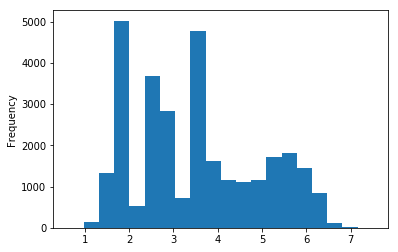

In [112]:
import matplotlib.pyplot as plt
df['Displacement'].plot('hist', bins=20)
plt.show()

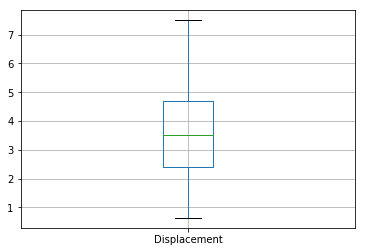

In [113]:
df.boxplot(column='Displacement')
plt.show()

In [114]:
df['Displacement'].describe()

count    30124.000000
mean         3.543730
std          1.413073
min          0.632000
25%          2.400000
50%          3.500000
75%          4.700000
max          7.500000
Name: Displacement, dtype: float64

In [115]:
# update for features
engine_list = ['HP1', 'HP2', 'Engine_Type', 'Displacement']

## Corrosion data cleaning

In [116]:
corrosion_list = [
 'Corrosion Miles/km',
 'Corrosion Years',
 'Corrosion Note']

df['Corrosion_Years'] = df['Corrosion Years']
df['Corrosion_Miles'] = df['Corrosion Miles/km']

In [117]:
# df['Corrosion Years'] = pd.to_numeric(df['Corrosion Years'], errors='coerse')

In [118]:
corrosion_list = ['Corrosion_Miles', 'Corrosion_Years']

In [119]:
df[corrosion_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32262 entries, 0 to 32315
Data columns (total 2 columns):
Corrosion_Miles    29258 non-null object
Corrosion_Years    29296 non-null object
dtypes: object(2)
memory usage: 2.0+ MB


In [120]:
df[corrosion_list].nunique()

Corrosion_Miles    5
Corrosion_Years    9
dtype: int64

In [121]:
df['Corrosion_Miles'].value_counts()

Unlimited    20747
100,000       7292
50,000        1105
100000         108
60,000           6
Name: Corrosion_Miles, dtype: int64

In [122]:
df['Corrosion_Miles'] = df['Corrosion_Miles'].str.replace(',', '')


df['Corrosion_Miles'] = df['Corrosion_Miles'].str.replace('Unlimited', '300000')

In [123]:
df['Corrosion_Miles'].value_counts()

300000    20747
100000     7400
50000      1105
60000         6
Name: Corrosion_Miles, dtype: int64

In [124]:
df['Corrosion_Miles'] = pd.to_numeric(df['Corrosion_Miles'], errors='coerse')

In [125]:
df[corrosion_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32262 entries, 0 to 32315
Data columns (total 2 columns):
Corrosion_Miles    29258 non-null float64
Corrosion_Years    29296 non-null object
dtypes: float64(1), object(1)
memory usage: 2.0+ MB


In [126]:
# used as features
corrosion_list = ['Corrosion_Miles', 'Corrosion_Years']

## Miscillaneous data cleaning

 drop non-essencial and repeated columns: 
 
 'Model', 'index',  'EPA Classification',  'Number of Passenger Doors',    'Rear Door Type', 'Front Tire Order Code',
 'Rear Tire Order Code',
 'Spare Tire Order Code',
 'Spare Wheel Material',
  'Roadside Assistance Note',
  'Lock to Lock Turns (Steering)',
 'Steering Ratio (:1), Overall',

 'Hybrid/Electric Components Miles/km',
 'Hybrid/Electric Components Years',
 'Hybrid/Electric Components Note',
    
 'Transfer Case Model',
 'Transfer Case Gear Ratio (:1), High',
 'Transfer Case Gear Ratio (:1), Low',
 'Transfer Case Power Take Off',

 'Warranty Note',                           
 'Basic Note',
 'Maintenance Note',
 
  'Emissions Miles/km',
 'Emissions Years',
 'Emissions Note',    
  'EPA Air Pollution Score', 51 counts
  ['Drivetrain Note'] 1135
  
  
 'Steering Type',
 'Steering Ratio (:1), On Center',
 'Steering Ratio (:1), At Lock',


 'Revolutions/Mile @ 45 mph - Spare',
 'Revolutions/Mile @ 45 mph - Front',
 'Revolutions/Mile @ 45 mph - Rear',

In [127]:
df[[ 'EPA Class', 'EPA Classification']].head()

,EPA Class,EPA Classification
0,Small Sport Utility Vehicles 2WD,Small Sport Utility Vehicles 2WD
1,Small Sport Utility Vehicles 2WD,Small Sport Utility Vehicles 2WD
2,Small Sport Utility Vehicles 2WD,Small Sport Utility Vehicles 2WD
3,Small Sport Utility Vehicles 2WD,Small Sport Utility Vehicles 2WD
4,Small Sport Utility Vehicles 4WD,Small Sport Utility Vehicles 4WD


In [128]:
miscil = [
 'Year',
 'Model',
 'Specs',
 'MSRP',
    
 'EPA Class',

 'Body Style',
 'Drivetrain',
 'Passenger Capacity',
 'Passenger Doors',

 'Front Wheel Material',
 'Rear Wheel Material',

 'Basic Miles/km',
 'Basic Years',
                           
 'Drivetrain Miles/km',
 'Drivetrain Years',
    
 'Roadside Assistance Miles/km',
 'Roadside Assistance Years',
    
 'Maximum Alternator Capacity (amps)',
                    
 'Maintenance Miles/km',

 'Maintenance Years',

 'Maximum Alternator Watts',
 'Other Features']

In [129]:
miscil_to_float_cols = [
 'Passenger Capacity',
 'Passenger Doors',
 'Basic Miles/km',
 'Basic Years',
                           
 'Drivetrain Miles/km',
 'Drivetrain Years',
    
 'Roadside Assistance Miles/km',
 'Roadside Assistance Years',
    
 'Maximum Alternator Capacity (amps)',
                    
 'Maintenance Miles/km',

 'Maintenance Years',

 'Maximum Alternator Watts']

In [ ]:
# df.rename(columns={'Maximum Alternator Watts': 'Max_Alternator_Watts'})

In [130]:
df[miscil]

,Year,Model,Specs,MSRP,EPA Class,Body Style,Drivetrain,Passenger Capacity,Passenger Doors,Front Wheel Material,Rear Wheel Material,Basic Miles/km,Basic Years,Drivetrain Miles/km,Drivetrain Years,Roadside Assistance Miles/km,Roadside Assistance Years,Maximum Alternator Capacity (amps),Maintenance Miles/km,Maintenance Years,Maximum Alternator Watts,Other Features
0,2019,2019 Acura RDX,FWD w/Technology Pkg,40600,Small Sport Utility Vehicles 2WD,Sport Utility,Front Wheel Drive,5,4,Aluminum,Aluminum,"50,000",4,"70,000",6,"50,000",4,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...
1,2019,2019 Acura RDX,FWD w/Advance Pkg,45500,Small Sport Utility Vehicles 2WD,Sport Utility,Front Wheel Drive,5,4,Aluminum,Aluminum,"50,000",4,"70,000",6,"50,000",4,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...
2,2019,2019 Acura RDX,FWD w/A-Spec Pkg,43600,Small Sport Utility Vehicles 2WD,Sport Utility,Front Wheel Drive,5,4,Aluminum,Aluminum,"50,000",4,"70,000",6,"50,000",4,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...
3,2019,2019 Acura RDX,FWD,37400,Small Sport Utility Vehicles 2WD,Sport Utility,Front Wheel Drive,5,4,Aluminum,Aluminum,"50,000",4,"70,000",6,"50,000",4,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...
4,2019,2019 Acura RDX,AWD w/Technology Pkg,42600,Small Sport Utility Vehicles 4WD,Sport Utility,All Wheel Drive,5,4,Aluminum,Aluminum,"50,000",4,"70,000",6,"50,000",4,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...
5,2019,2019 Acura RDX,AWD w/Advance Pkg,47500,Small Sport Utility Vehicles 4WD,Sport Utility,All Wheel Drive,5,4,Aluminum,Aluminum,"50,000",4,"70,000",6,"50,000",4,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...
6,2019,2019 Acura RDX,AWD w/A-Spec Pkg,45600,Small Sport Utility Vehicles 4WD,Sport Utility,All Wheel Drive,5,4,Aluminum,Aluminum,"50,000",4,"70,000",6,"50,000",4,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...
7,2018,2018 Acura RDX,AWD,37500,Small Sport Utility Vehicles 4WD,Sport Utility,All Wheel Drive,5,4,Aluminum,Aluminum,"50,000",4,"70,000",6,"50,000",4,130,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...
8,2018,2018 Acura RDX,FWD w/Technology/AcuraWatch Plus Pkg,41000,Small Sport Utility Vehicles 2WD,Sport Utility,Front Wheel Drive,5,4,Aluminum,Aluminum,"50,000",4,"70,000",6,"50,000",4,130,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...
9,2018,2018 Acura RDX,FWD w/Technology Pkg,39700,Small Sport Utility Vehicles 2WD,Sport Utility,Front Wheel Drive,5,4,Aluminum,Aluminum,"50,000",4,"70,000",6,"50,000",4,130,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...


In [131]:
df.loc[df['Maximum Alternator Watts']!= np.nan, 'Maximum Alternator Watts']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
        ... 
32286    NaN
32287    NaN
32288    NaN
32289    NaN
32290    NaN
32291    NaN
32292    NaN
32293    NaN
32294    NaN
32295    NaN
32296    NaN
32297    NaN
32298    NaN
32299    NaN
32300    NaN
32301    NaN
32302    NaN
32303    NaN
32304    NaN
32305    NaN
32306    NaN
32307    NaN
32308    NaN
32309    NaN
32310    NaN
32311    NaN
32312    NaN
32313    NaN
32314    NaN
32315    NaN
Name: Maximum Alternator Watts, Length: 32262, dtype: object

In [132]:
df['Basic Miles/km'] = df['Basic Miles/km'].str.replace(',', '')

In [133]:
df['Roadside Assistance Miles/km'] = df['Roadside Assistance Miles/km'].str.replace(',', '')

In [134]:
df['Maintenance Miles/km'] = df['Maintenance Miles/km'].str.replace(',', '')

In [135]:
df['Drivetrain Miles/km'] = df['Drivetrain Miles/km'].str.replace(',', '')

In [136]:
# Count nulls for each column
for i in range(len(miscil)):
    counts = df[miscil[i]].notnull().sum()
    print(df[[miscil[i]]].columns.tolist(), counts)

['Year'] 32262
['Model'] 32262
['Specs'] 32262
['MSRP'] 32262
['EPA Class'] 30286
['Body Style'] 30546
['Drivetrain'] 30546
['Passenger Capacity'] 32262
['Passenger Doors'] 32262
['Front Wheel Material'] 30293
['Rear Wheel Material'] 30293
['Basic Miles/km'] 30145
['Basic Years'] 30145
['Drivetrain Miles/km'] 29474
['Drivetrain Years'] 29474
['Roadside Assistance Miles/km'] 25247
['Roadside Assistance Years'] 25250
['Maximum Alternator Capacity (amps)'] 27371
['Maintenance Miles/km'] 5569
['Maintenance Years'] 5569
['Maximum Alternator Watts'] 4445
['Other Features'] 30562


In [137]:
df['Other Features'].nunique()

6418

In [138]:
df[miscil].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32262 entries, 0 to 32315
Data columns (total 22 columns):
Year                                  32262 non-null category
Model                                 32262 non-null object
Specs                                 32262 non-null object
MSRP                                  32262 non-null int64
EPA Class                             30286 non-null object
Body Style                            30546 non-null object
Drivetrain                            30546 non-null object
Passenger Capacity                    32262 non-null object
Passenger Doors                       32262 non-null object
Front Wheel Material                  30293 non-null object
Rear Wheel Material                   30293 non-null object
Basic Miles/km                        30145 non-null object
Basic Years                           30145 non-null object
Drivetrain Miles/km                   29474 non-null object
Drivetrain Years                      29474 non-nu

In [139]:
to_float(miscil_to_float_cols)

In [140]:
df[miscil_to_float_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32262 entries, 0 to 32315
Data columns (total 12 columns):
Passenger Capacity                    32262 non-null int64
Passenger Doors                       32262 non-null int64
Basic Miles/km                        29879 non-null float64
Basic Years                           30145 non-null float64
Drivetrain Miles/km                   29076 non-null float64
Drivetrain Years                      29374 non-null float64
Roadside Assistance Miles/km          19088 non-null float64
Roadside Assistance Years             24632 non-null float64
Maximum Alternator Capacity (amps)    22714 non-null float64
Maintenance Miles/km                  5519 non-null float64
Maintenance Years                     5569 non-null float64
Maximum Alternator Watts              1920 non-null float64
dtypes: float64(10), int64(2)
memory usage: 4.4 MB


In [142]:
# Put together all features
features = [miscil, weight_list, size_list, gear_ratio_list, safety_list, fuel_economy_list, brake_list, 
                suspension_list, trans_list, axle_list, battery_list, engine_list, corrosion_list]
all = []
for i in range(len(features)):
    all += features[i]


In [143]:
df[all]

,Year,Model,Specs,MSRP,EPA Class,Body Style,Drivetrain,Passenger Capacity,Passenger Doors,Front Wheel Material,Rear Wheel Material,Basic Miles/km,Basic Years,Drivetrain Miles/km,Drivetrain Years,Roadside Assistance Miles/km,Roadside Assistance Years,Maximum Alternator Capacity (amps),Maintenance Miles/km,Maintenance Years,Maximum Alternator Watts,Other Features,Weight,Trailer_cpt,Volume,Width,Height,Length,Air Bag-Frontal-Driver,Air Bag-Frontal-Passenger,Air Bag-Passenger Switch (On/Off),Air Bag-Side Body-Front,Air Bag-Side Body-Rear,Air Bag-Side Head-Front,Air Bag-Side Head-Rear,Child Safety Rear Door Locks,Daytime Running Lights,Traction Control,Night Vision,Rollover Protection Bars,Fog Lamps,Parking Aid,Tire Pressure Monitor,Back-Up Camera,Stability Control,Fuel_Tank_Cpt,MPG_avg,MPG_City,MPG_Hwy,Suspension Type - Front,Suspension Type - Front (Cont.),Suspension Type - Rear,Suspension Type - Rear (Cont.),Trans_Speed,Battery_Amps,HP1,HP2,Engine_Type,Displacement,Corrosion_Miles,Corrosion_Years
0,2019,2019 Acura RDX,FWD w/Technology Pkg,40600,Small Sport Utility Vehicles 2WD,Sport Utility,Front Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,NaN,NaN,NaN,74.8,65.7,NaN,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,17.1,24.0,22.0,28.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,300000.0,5
1,2019,2019 Acura RDX,FWD w/Advance Pkg,45500,Small Sport Utility Vehicles 2WD,Sport Utility,Front Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,NaN,NaN,NaN,74.8,65.7,NaN,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,17.1,24.0,22.0,28.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,300000.0,5
2,2019,2019 Acura RDX,FWD w/A-Spec Pkg,43600,Small Sport Utility Vehicles 2WD,Sport Utility,Front Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,NaN,NaN,NaN,74.8,65.7,NaN,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,17.1,24.0,22.0,27.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,300000.0,5
3,2019,2019 Acura RDX,FWD,37400,Small Sport Utility Vehicles 2WD,Sport Utility,Front Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,NaN,NaN,NaN,74.8,65.7,NaN,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,17.1,24.0,22.0,28.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,300000.0,5
4,2019,2019 Acura RDX,AWD w/Technology Pkg,42600,Small Sport Utility Vehicles 4WD,Sport Utility,All Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,NaN,NaN,NaN,74.8,65.7,NaN,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,17.1,23.0,21.0,27.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,300000.0,5
5,2019,2019 Acura RDX,AWD w/Advance Pkg,47500,Small Sport Utility Vehicles 4WD,Sport Utility,All Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,NaN,NaN,NaN,74.8,65.7,NaN,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,17.1,23.0,21.0,27.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,300000.0,5
6,2019,2019 Acura RDX,AWD w/A-Spec Pkg,45600,Small Sport Utility Vehicles 4WD,Sport Utility,All Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,NaN,NaN,NaN,74.8,65.7,NaN,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,17.1,23.0,21.0,26.0,Strut,Strut,M

In [144]:
df[all].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32262 entries, 0 to 32315
Data columns (total 61 columns):
Year                                  32262 non-null category
Model                                 32262 non-null object
Specs                                 32262 non-null object
MSRP                                  32262 non-null int64
EPA Class                             30286 non-null object
Body Style                            30546 non-null object
Drivetrain                            30546 non-null object
Passenger Capacity                    32262 non-null int64
Passenger Doors                       32262 non-null int64
Front Wheel Material                  30293 non-null object
Rear Wheel Material                   30293 non-null object
Basic Miles/km                        29879 non-null float64
Basic Years                           30145 non-null float64
Drivetrain Miles/km                   29076 non-null float64
Drivetrain Years                      29374 non-n

In [171]:
dict.update(dict1)

In [172]:
print(dict)

{'Suspension Type - Front': 'Susp_Front', 'Suspension Type - Front (Cont.)': 'Susp_Front2', 'Suspension Type - Rear': 'Susp_Rear', 'Suspension Type - Rear (Cont.)': 'Susp_Rear2', 'Air Bag-Frontal-Driver': 'Airbag_Front_Driver', 'Air Bag-Frontal-Passenger': 'Airbag_Front_Psg', 'Air Bag-Passenger Switch (On/Off)': 'Airbag_Psg_Switch', 'Air Bag-Side Body-Front': 'Airbag_SBF', 'Air Bag-Side Body-Rear': 'Airbag_SBR', 'Air Bag-Side Head-Front': 'Airbag_SHF', 'Air Bag-Side Head-Rear': 'Airbag_SHR', 'Child Safety Rear Door Locks': 'Child_Door_Locks', 'Daytime Running Lights': 'Day_Lights', 'Traction Control': 'Trac_Control', 'Night Vision': 'Night_Vision', 'Rollover Protection Bars': 'Rollover_Prt', 'Fog Lamps': 'Fog_Lamps', 'Parking Aid': 'Parking_Aid', 'Tire Pressure Monitor': 'Tire_P_Monitor', 'Back-Up Camera': 'Backup_Camera', 'Stability Control': 'Stability_Ctl'}


In [175]:
all = [dict(k) for k in all if k in list(dict.keys()) else k]

SyntaxError: invalid syntax (<ipython-input-175-185bfad66f93>, line 1)

In [182]:
keys = list(dict.keys())
all = [dict(key) if key in all for key in keys else key]

SyntaxError: invalid syntax (<ipython-input-182-7abd7d005440>, line 2)

In [177]:
list(dict.keys())

['Suspension Type - Front',
 'Suspension Type - Front (Cont.)',
 'Suspension Type - Rear',
 'Suspension Type - Rear (Cont.)',
 'Air Bag-Frontal-Driver',
 'Air Bag-Frontal-Passenger',
 'Air Bag-Passenger Switch (On/Off)',
 'Air Bag-Side Body-Front',
 'Air Bag-Side Body-Rear',
 'Air Bag-Side Head-Front',
 'Air Bag-Side Head-Rear',
 'Child Safety Rear Door Locks',
 'Daytime Running Lights',
 'Traction Control',
 'Night Vision',
 'Rollover Protection Bars',
 'Fog Lamps',
 'Parking Aid',
 'Tire Pressure Monitor',
 'Back-Up Camera',
 'Stability Control']

In [181]:
print(dict)

{'Suspension Type - Front': 'Susp_Front', 'Suspension Type - Front (Cont.)': 'Susp_Front2', 'Suspension Type - Rear': 'Susp_Rear', 'Suspension Type - Rear (Cont.)': 'Susp_Rear2', 'Air Bag-Frontal-Driver': 'Airbag_Front_Driver', 'Air Bag-Frontal-Passenger': 'Airbag_Front_Psg', 'Air Bag-Passenger Switch (On/Off)': 'Airbag_Psg_Switch', 'Air Bag-Side Body-Front': 'Airbag_SBF', 'Air Bag-Side Body-Rear': 'Airbag_SBR', 'Air Bag-Side Head-Front': 'Airbag_SHF', 'Air Bag-Side Head-Rear': 'Airbag_SHR', 'Child Safety Rear Door Locks': 'Child_Door_Locks', 'Daytime Running Lights': 'Day_Lights', 'Traction Control': 'Trac_Control', 'Night Vision': 'Night_Vision', 'Rollover Protection Bars': 'Rollover_Prt', 'Fog Lamps': 'Fog_Lamps', 'Parking Aid': 'Parking_Aid', 'Tire Pressure Monitor': 'Tire_P_Monitor', 'Back-Up Camera': 'Backup_Camera', 'Stability Control': 'Stability_Ctl'}


# EDA

In [ ]:
plt.scatter(df['Displacement'], df['MSRP'])
plt.show()

In [ ]:
df['Base Curb Weight (lbs)']
df = df.rename(columns={'Base Curb Weight (lbs)': 'Curb_Weight'})
df['Curb_Weight']

In [ ]:
df['Curb_Weight'].isnull().sum()/len(df)*100

In [ ]:
df['Curb_Weight'].dtype

In [ ]:
df['Curb_Weight'] = pd.to_numeric(df['Curb_Weight'], errors='coerce')
df['Curb_Weight'].dtype

In [ ]:
df.boxplot(column='Curb_Weight')
plt.show()

In [ ]:
df['Curb_Weight'].describe()

In [ ]:
df['Curb_Weight'].plot('hist', bins=25)
plt.show()

In [ ]:
plt.scatter(df['Curb_Weight'], df['MSRP'])
plt.show()

In [ ]:
weight_2018 = df['Curb_Weight'].where(df['Year']=='2018')
MSRP_2018 = df['MSRP'].where(df['Year']=='2018')
MSRP_2018

In [ ]:

plt.scatter(weight_2018, MSRP_2018)
plt.show()

In [ ]:
time.time()-start